In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib widget

In [2]:
df_b = pd.read_csv('../cleaned_data/condensed_dataframes/data_exp-bapt_jun22.csv')
df_c = pd.read_csv('../cleaned_data/condensed_dataframes/data_exp-camille_jun23.csv')

In [3]:
df_b = df_b.rename(columns={'speed': 'u', 'number_of_fish': 'n', 'metabolic_rate_segmented': 'mo2', 'metabolic_rate_segmented_error': 'mo2_se'})
df_c = df_c.rename(columns={'speed (BL/s)': 'u', 'nfish': 'n', 'metabolic rate (mg of O2/h)': 'mo2', 'metabolic rate std error (mg of O2/h)': 'mo2_se'})

df_b['mo2_fish'] = df_b.mo2 / df_b.n
df_c['mo2_fish'] = df_c.mo2 / df_c.n

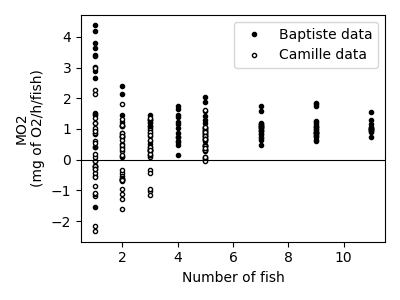

In [4]:
fig, ax = plt.subplots(figsize=(4, 3)) 

ax.plot(df_b.n, df_b.mo2 / df_b.n, "k.", label='Baptiste data')
ax.plot(df_c.n, df_c.mo2 / df_c.n, "k.", mfc='w', label='Camille data')

ax.axhline(0, color='k', lw=0.8)

ax.set_xlabel('Number of fish')
ax.set_ylabel('MO2\n(mg of O2/h/fish)')
ax.legend()
fig.tight_layout()

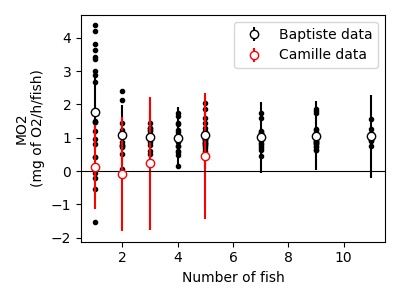

In [5]:
fig, ax = plt.subplots(figsize=(4, 3)) 

def quad_mean(array):
    return np.sqrt(np.sum(array**2))

ax.plot(df_b.n, df_b.mo2 / df_b.n, "k.")
# ax.plot(df_c.n, df_c.mo2 / df_c.n, "r.", mfc='w')

grb = df_b.groupby('n', as_index=False).mean()
grb_e = df_b.groupby('n', as_index=False).apply(quad_mean)
ax.errorbar(grb.n, grb.mo2/grb.n, yerr=grb_e.mo2_se, fmt='ko', mfc='w', label='Baptiste data')

grc = df_c.groupby('n', as_index=False).mean()
grc_e = df_c.groupby('n', as_index=False).std()
ax.errorbar(grc.n, grc.mo2/grc.n, yerr=grc_e.mo2, fmt='ro', mfc='w', label='Camille data')

ax.axhline(0, color='k', lw=0.8)
ax.set_xlabel('Number of fish')
ax.set_ylabel('MO2\n(mg of O2/h/fish)')
ax.legend() 
fig.tight_layout()